In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [75]:
df

,Дата,Склад,Контрагент,Номенклатура,Количество
0,2018-01-04,1,address_0,product_0,4
1,2018-01-04,1,address_0,product_1,4
2,2018-01-04,1,address_0,product_2,5
3,2018-01-04,1,address_0,product_3,10
4,2018-01-04,1,address_0,product_4,2
...,...,...,...,...,...
301350,2018-08-31,5,address_173,product_15,0
301351,2018-08-31,5,address_173,product_17,1
301352,2018-08-31,5,address_173,product_18,1
301353,2018-08-31,5,address_173,product_19,0


Проверяем формат столбцов

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [118]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [78]:
grouped_df = df[['Дата','Количество']].groupby(['Дата']).sum()

Вывести несколько первых строк сгруппированных данных

In [116]:
grouped_df.head()

,Количество
Дата,
2018-01-04,3734
2018-01-05,3643
2018-01-06,3193
2018-01-07,3298
2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

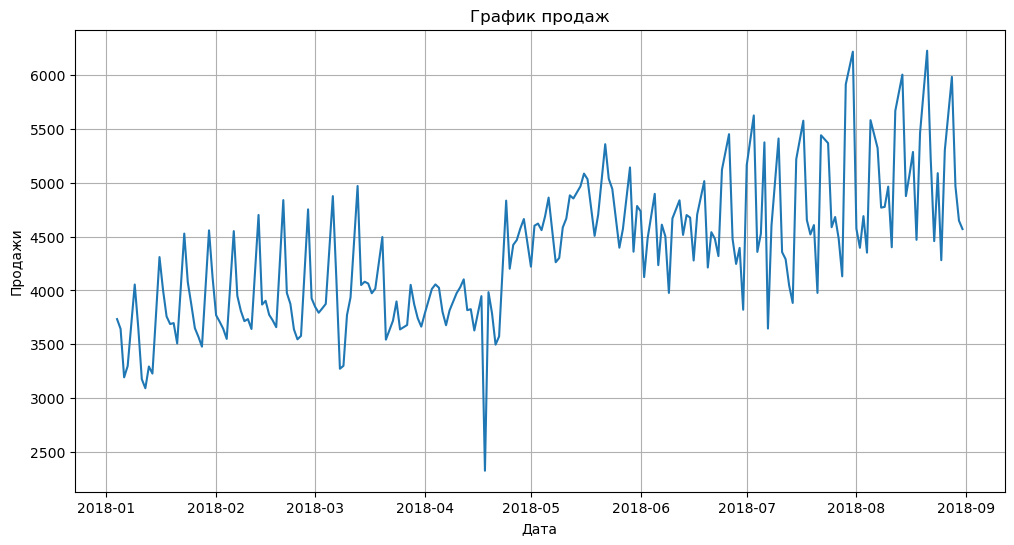

In [134]:
plt.figure(figsize=(12,6))
plt.plot(df['Дата'].unique(), grouped_df['Количество'])
plt.title('График продаж')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

На графике мы видим продажи в период времени с 2018-01 до 2018-09. Можно увидеть, что в середине апреля продажи сильно проседают. Наиболее благоприятным периодом для нашего бизнеса приходится на июль-август.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [83]:
df[df['Количество']== df['Количество'].max()]

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [84]:
wednesdays = df[(df['Дата'].dt.weekday == 2) & (df['Склад'] == 3)]

month_dict = {6:'июнь',7:'июль',8:'август'}
for i in range(6,9):
    month = wednesdays[wednesdays['Дата'].dt.month == i]
    result = month[['Дата','Номенклатура','Количество']].groupby(['Дата', 'Номенклатура']).sum()
    print(f"Топовый товар по продажам по средам за {month_dict.get(i)} у 3 склада:{result.sort_values('Количество', ascending=False).iloc[0]}\n")


Топовый товар по продажам по средам за июнь у 3 склада:Количество    169
Name: (2018-06-27 00:00:00, product_1), dtype: int64

Топовый товар по продажам по средам за июль у 3 склада:Количество    179
Name: (2018-07-25 00:00:00, product_1), dtype: int64

Топовый товар по продажам по средам за август у 3 склада:Количество    199
Name: (2018-08-22 00:00:00, product_1), dtype: int64



Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [123]:
T_df = pd.read_excel('35188.04.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.xls', skiprows=6) 
T_df = T_df.iloc[:,:2]
T_df = T_df.rename(columns={'Местное время в Астане':'Дата'}) 
T_df['Дата'] = pd.to_datetime(T_df['Дата'], format='%d.%m.%Y %H:%M')
T_df = T_df.groupby(T_df['Дата'].dt.date)["T"].mean().reset_index()
T_df['Дата'] = pd.to_datetime(T_df['Дата'], format='%d.%m.%Y')
T_df

,Дата,T
0,2018-01-04,-13.0875
1,2018-01-05,-17.2500
2,2018-01-06,-14.1250
3,2018-01-07,-12.3375
4,2018-01-08,-15.4375
...,...,...
235,2018-08-27,12.2250
236,2018-08-28,14.1000
237,2018-08-29,14.0375
238,2018-08-30,14.1625


In [124]:
new_df = pd.merge(grouped_df, T_df, on='Дата')
new_df

,Дата,Количество,T
0,2018-01-04,3734,-13.0875
1,2018-01-05,3643,-17.2500
2,2018-01-06,3193,-14.1250
3,2018-01-07,3298,-12.3375
4,2018-01-09,4055,-7.3875
...,...,...,...
200,2018-08-26,5302,12.0500
201,2018-08-28,5983,14.1000
202,2018-08-29,4969,14.0375
203,2018-08-30,4648,14.1625


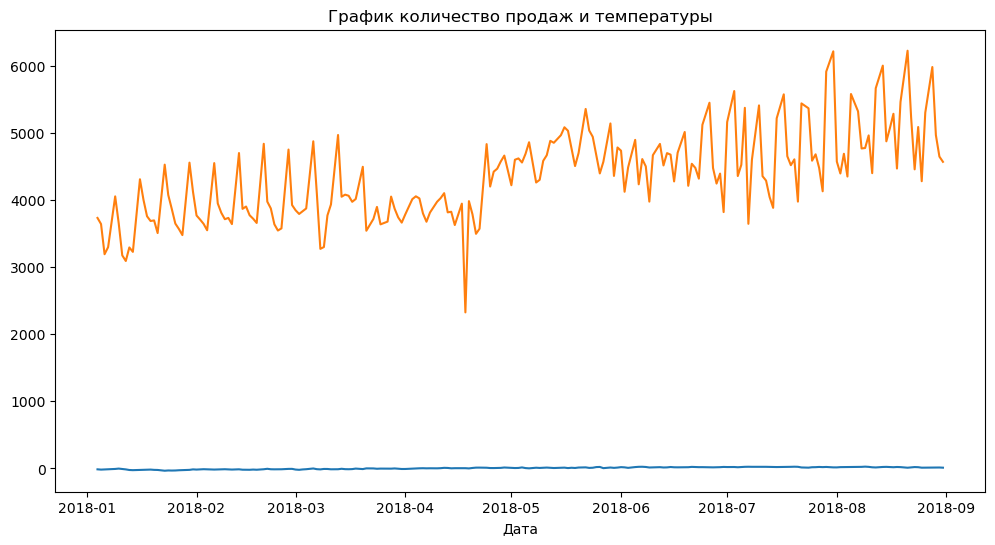

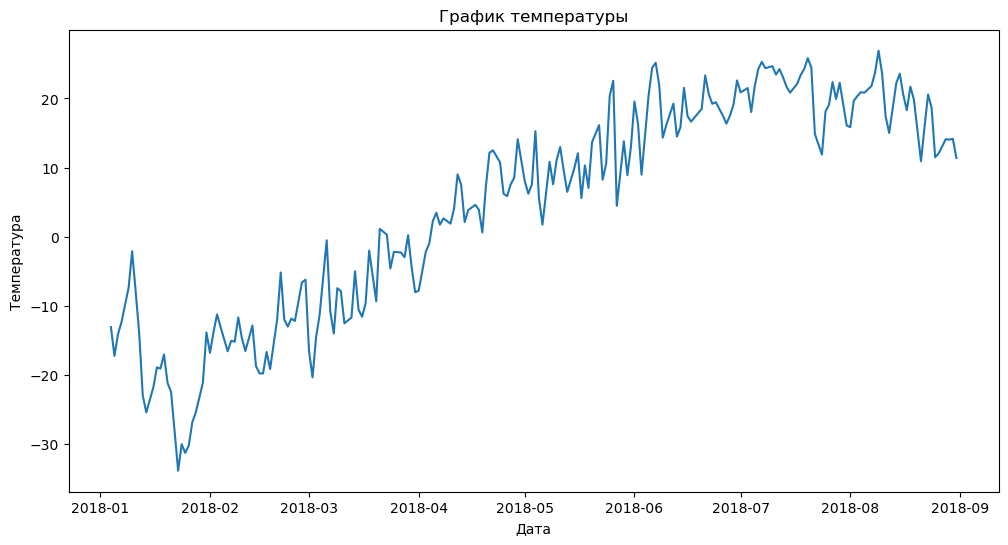

In [139]:
plt.figure(figsize=(12,6))
plt.plot(new_df['Дата'], new_df['T'], label='Температура')
plt.plot(new_df['Дата'], new_df['Количество'], label='Количество продаж')
plt.xlabel('Дата')
plt.title('График количество продаж и температуры')

plt.figure(figsize=(12,6))
plt.plot(new_df['Дата'], new_df['T'])
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.title('График температуры')
plt.show()